14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:


Auto['mpg01'] = mpg01

In [8]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/content/Auto.csv'  # Colab typically stores uploaded files in the /content directory
auto_data = pd.read_csv(file_path)

# Calculate the median of 'mpg' and create the binary variable 'mpg01'
mpg_median = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > mpg_median).astype(int)

# Display the first few rows to confirm the new column
auto_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

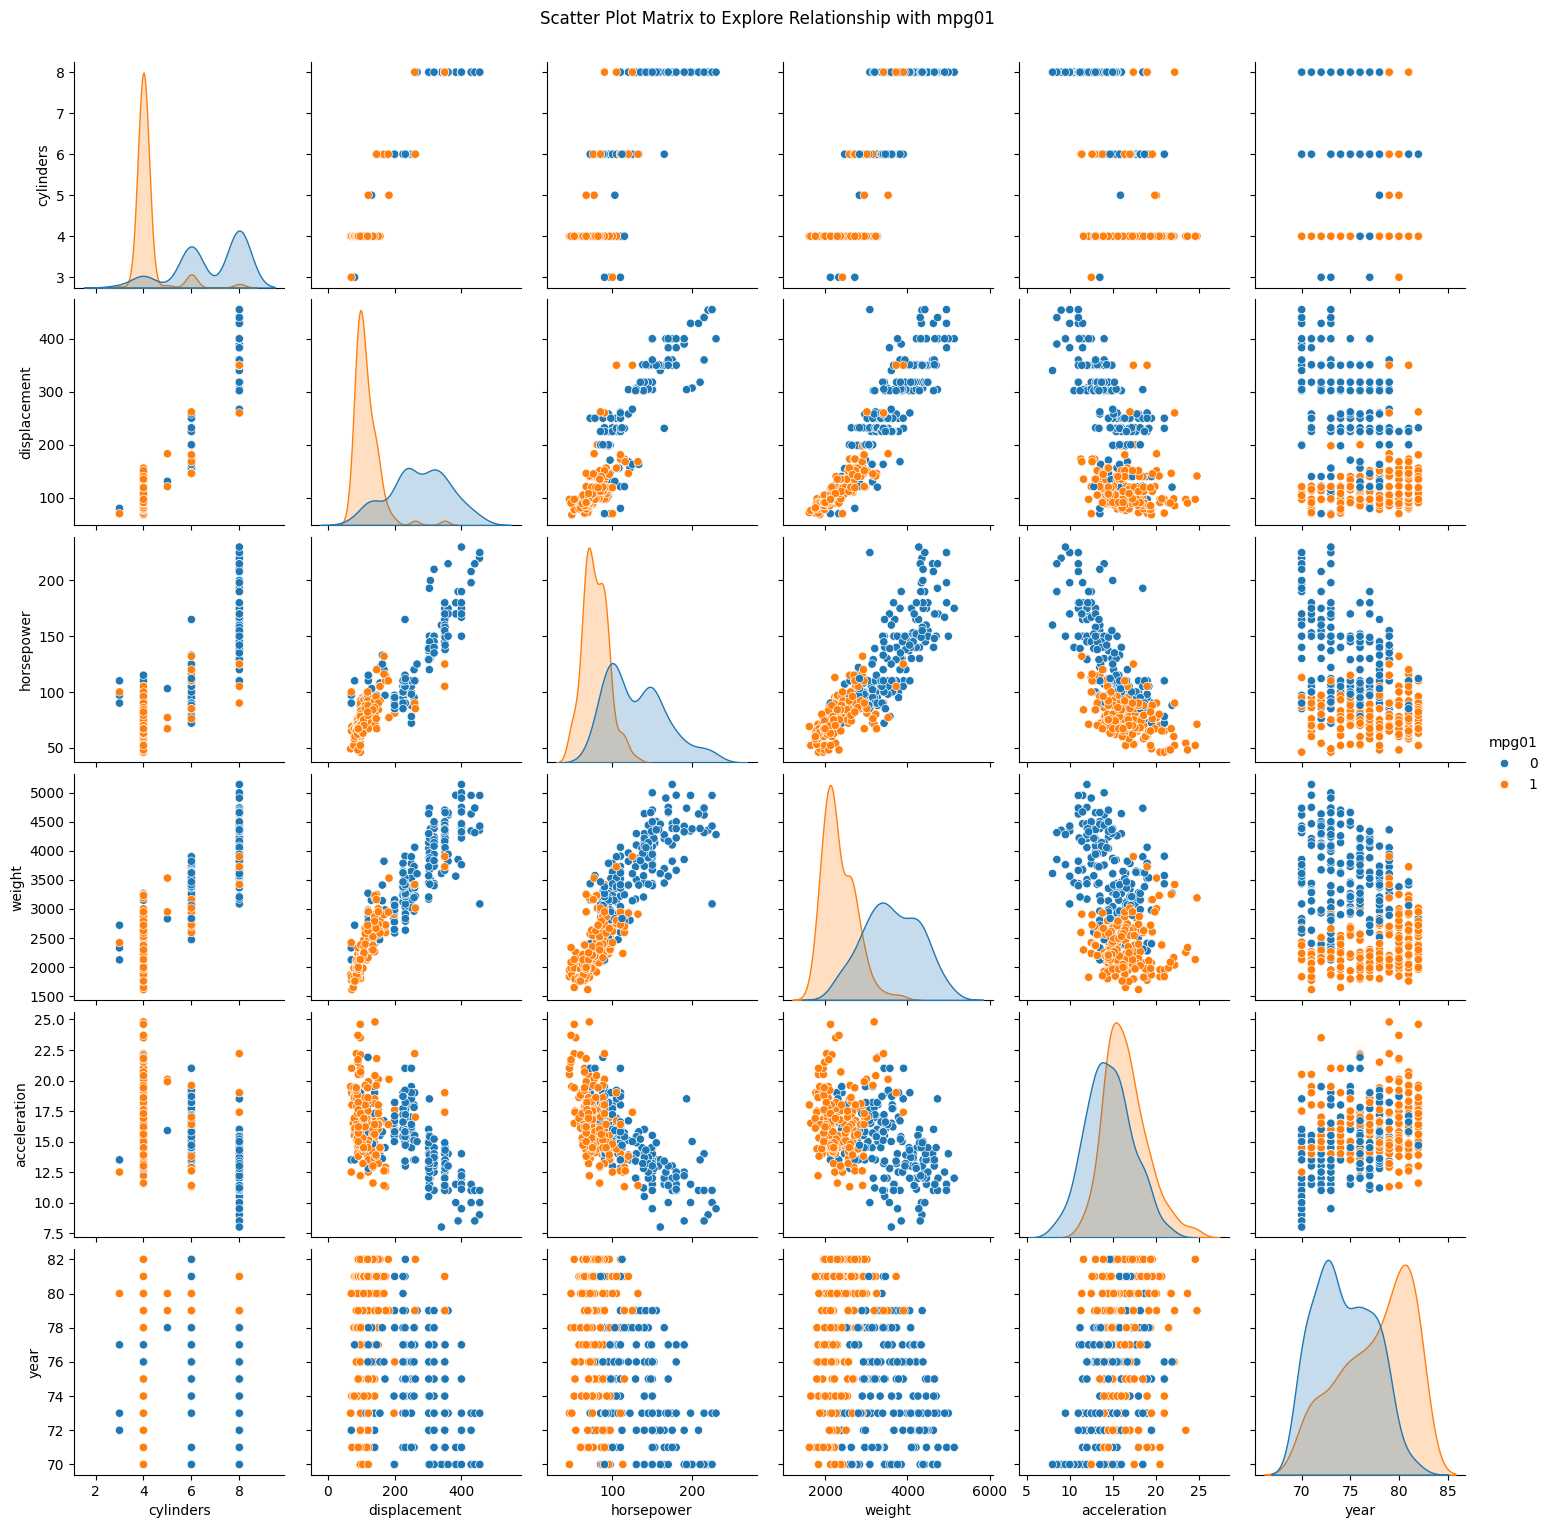

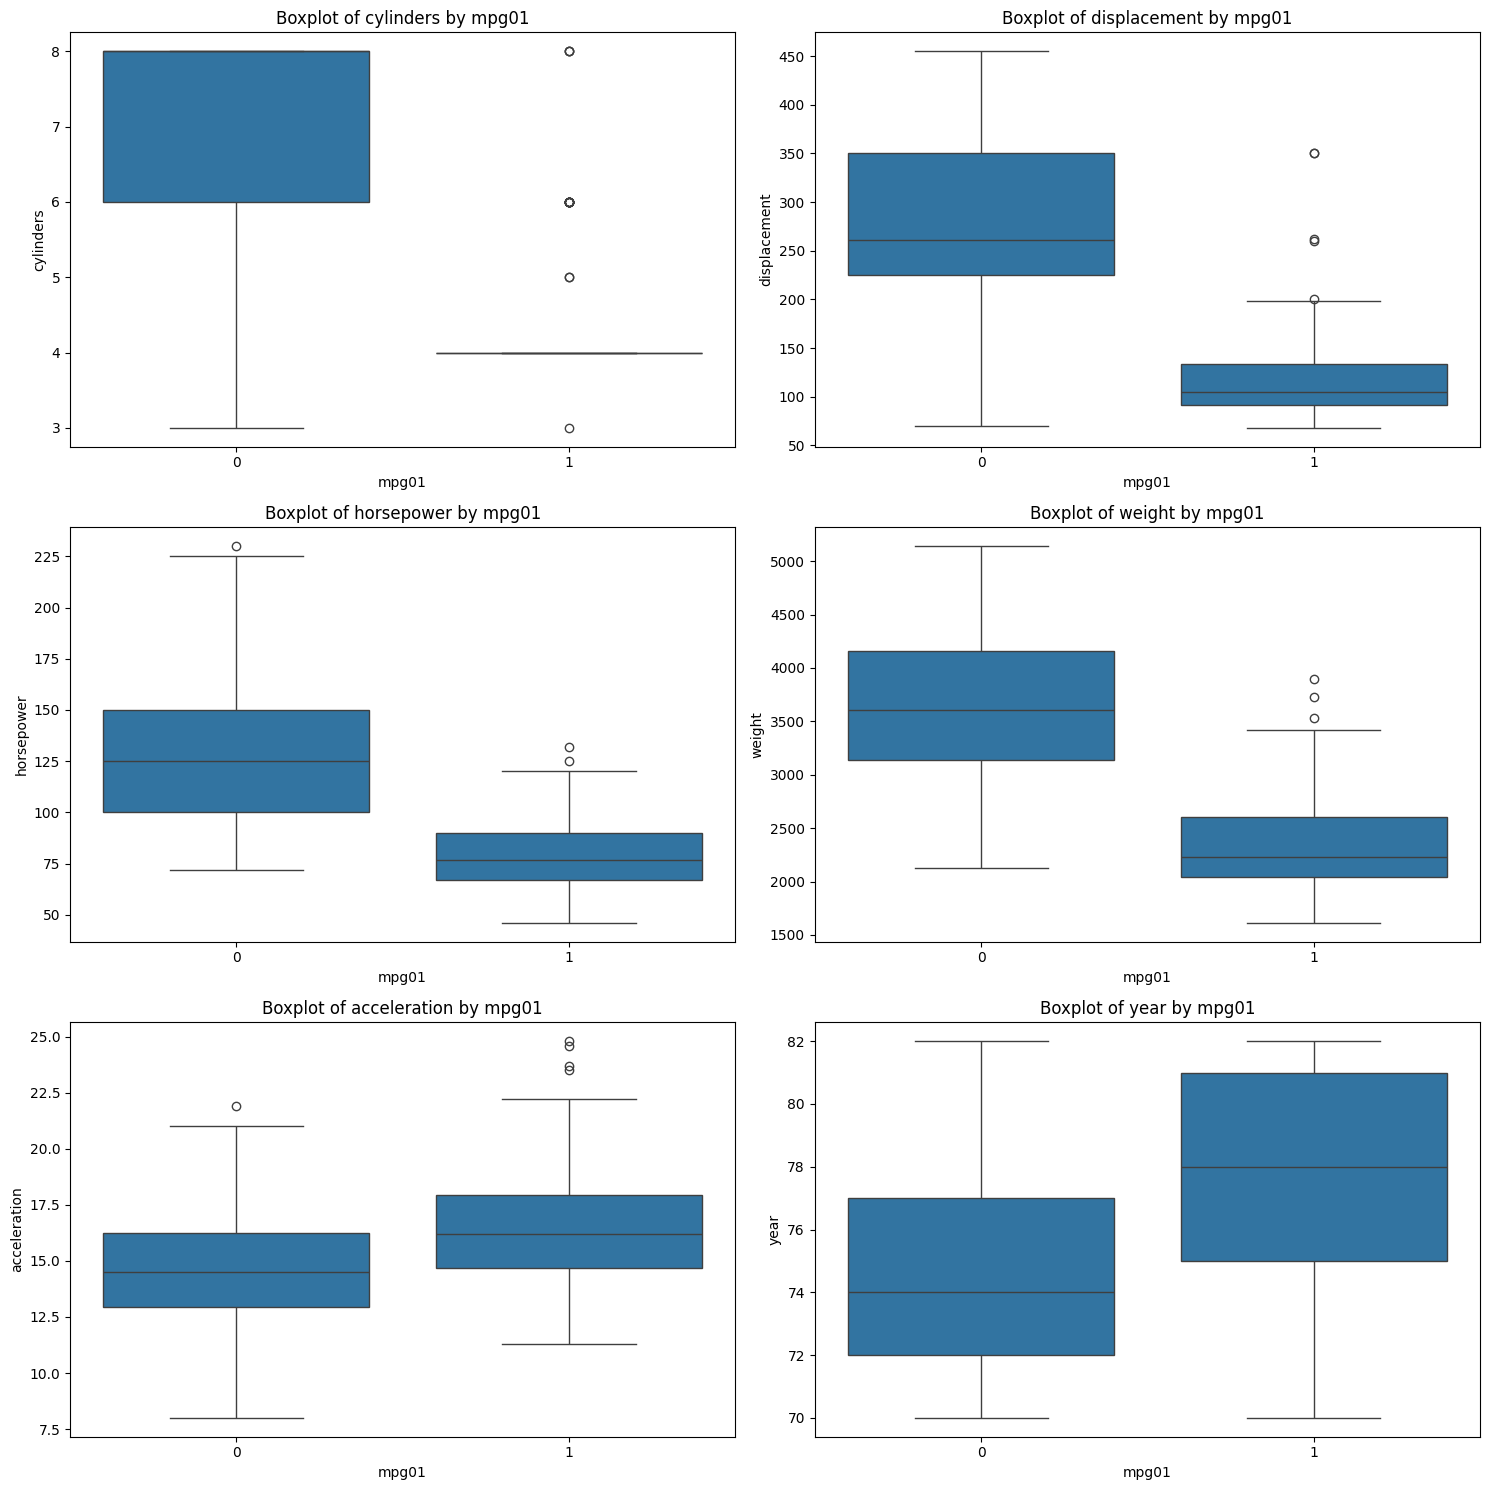

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Auto.csv'  # Update the path if needed
auto_data = pd.read_csv(file_path)

# Convert 'horsepower' to numeric, handling non-numeric values
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data.dropna(inplace=True)

# Create the binary variable 'mpg01'
mpg_median = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > mpg_median).astype(int)

# Scatter plot matrix to show relationships between features and mpg01
sns.pairplot(auto_data, hue='mpg01', vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'])
plt.suptitle("Scatter Plot Matrix to Explore Relationship with mpg01", y=1.02)

# Box plots for each numerical feature grouped by mpg01
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

for i, feature in enumerate(features):
    sns.boxplot(data=auto_data, x='mpg01', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {feature} by mpg01')

plt.tight_layout()
plt.show()


Pairplot: The sns.pairplot() function generates scatter plots for each pair of features, colored by mpg01, which visually highlights patterns.

Boxplots: Individual box plots for each feature, grouped by mpg01, help identify which features are potentially useful predictors of mpg01.

(c) Split the data into a training set and a test set.

In [10]:
from sklearn.model_selection import train_test_split

# Assuming 'auto_data' already has the 'mpg01' column created
# Define the predictors (X) and target variable (y)
X = auto_data.drop(columns=['mpg', 'mpg01', 'name'])  # Drop 'mpg', 'mpg01' (target), and any non-numeric columns
y = auto_data['mpg01']

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the size of each set
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (274, 7)
Test set size: (118, 7)


(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Define the predictor variables based on the features most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = lda.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)


Test Accuracy: 0.8728813559322034
Test Error: 0.1271186440677966


(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Define the predictor variables based on the features most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = qda.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)


Test Accuracy: 0.8728813559322034
Test Error: 0.1271186440677966


(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the predictor variables based on the features most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)


Test Accuracy: 0.8813559322033898
Test Error: 0.11864406779661019


(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the predictor variables based on the features most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = nb.predict(X_test_selected)

# Calculate test error
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)


Test Accuracy: 0.8728813559322034
Test Error: 0.1271186440677966


(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the predictor variables based on the features most associated with mpg01
selected_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Test several values of K
k_values = range(1, 21)
test_errors = []

for k in k_values:
    # Initialize and fit the KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_selected)

    # Calculate test error
    test_accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)

    print(f"K={k}: Test Accuracy={test_accuracy:.4f}, Test Error={test_error:.4f}")

# Find the best K value
best_k = k_values[test_errors.index(min(test_errors))]
print(f"\nBest K value: {best_k} with Test Error={min(test_errors):.4f}")


K=1: Test Accuracy=0.8475, Test Error=0.1525
K=2: Test Accuracy=0.8475, Test Error=0.1525
K=3: Test Accuracy=0.8644, Test Error=0.1356
K=4: Test Accuracy=0.8559, Test Error=0.1441
K=5: Test Accuracy=0.8390, Test Error=0.1610
K=6: Test Accuracy=0.8475, Test Error=0.1525
K=7: Test Accuracy=0.8305, Test Error=0.1695
K=8: Test Accuracy=0.8305, Test Error=0.1695
K=9: Test Accuracy=0.8305, Test Error=0.1695
K=10: Test Accuracy=0.8305, Test Error=0.1695
K=11: Test Accuracy=0.8220, Test Error=0.1780
K=12: Test Accuracy=0.8220, Test Error=0.1780
K=13: Test Accuracy=0.8220, Test Error=0.1780
K=14: Test Accuracy=0.8220, Test Error=0.1780
K=15: Test Accuracy=0.8220, Test Error=0.1780
K=16: Test Accuracy=0.8305, Test Error=0.1695
K=17: Test Accuracy=0.8220, Test Error=0.1780
K=18: Test Accuracy=0.8305, Test Error=0.1695
K=19: Test Accuracy=0.8220, Test Error=0.1780
K=20: Test Accuracy=0.8220, Test Error=0.1780

Best K value: 3 with Test Error=0.1356


Feature Selection: We use cylinders, displacement, horsepower, weight, and year as predictors.


Loop over K values: The code loops over values of K from 1 to 20.

Model Fitting and Prediction: For each K, a KNN model is trained, predictions are made, and the test error is calculated.

Best K Selection: The code identifies the K value with the lowest test error and prints it.